## Analysis for the checkpoint project I

#### Why does churn matter
- When churn is higher than growth, it's bad for business
- When a company's churn is higher than the competition (or the average of the industry), it means it's doing something wrong and customers are leaving
- When a company's churn is higher than the competition (or the average of the industry), it means it's loosing business to its competitors
#### Variable is CHURN
#### Goals: what are the drivers of churn?
- Service quality
- Price
- Poor customer service
- Features and content availibility
#### My MVP:
- One reason customers are churning
- One way to solve
- A clear process following the steps below and comprising photos and documentation:
    - Prepare
     Story
     Audience
     Setting
     Brainstorm
     Types of Viz
    - Talk and Listen
    - Sketch
    - Prototype
- My sources

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import math
telco = pd.read_csv("Arsene BOUNDAONE - jemison_spreadsheet_exercises - Copy of Table1_CustDetails.csv")

In [4]:
telco.sample(10)

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,monthly_charges2,validate,phone_service_type,internet_service_type,contract_type.1,rounded_tenure,service_type
2183,3129-AAQOU,Female,0,Yes,Yes,2,0,2,Mailed check,25.60,...,False,False,3,25.6,TRUE,Two or More Lines,Fiber Optic,2 Year,19.0,Phone
3017,4317-VTEOA,Male,0,No,No,1,1,0,Electronic check,50.75,...,True,True,0,50.75,TRUE,One Line,DSL,Month-to-Month,1.0,Internet+Phone
3310,4716-HHKQH,Male,1,Yes,No,2,2,0,Electronic check,107.05,...,True,True,1,107.05,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,20.0,Internet+Phone
4013,5652-MSDEY,Female,0,No,No,2,2,0,Mailed check,75.75,...,True,True,0,75.75,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,10.0,Internet+Phone
1209,1779-PWPMG,Female,1,Yes,No,2,2,2,Bank transfer (automatic),114.65,...,True,True,1,114.65,TRUE,Two or More Lines,Fiber Optic,2 Year,73.0,Internet+Phone
4236,5977-CKHON,Female,0,Yes,Yes,2,2,0,Bank transfer (automatic),92.55,...,True,True,3,92.55,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,44.0,Internet+Phone
4063,5729-KLZAR,Female,0,Yes,Yes,1,2,0,Electronic check,80.85,...,True,True,3,80.85,TRUE,One Line,DSL,Month-to-Month,4.0,Internet+Phone
3103,4450-MDZFX,Male,0,Yes,Yes,2,2,0,Bank transfer (automatic),74.35,...,True,True,3,74.35,TRUE,Two or More Lines,Fiber Optic,Month-to-Month,60.0,Internet+Phone
1257,1855-CFULU,Female,1,No,No,1,0,0,Mailed check,20.05,...,False,False,0,20.05,TRUE,One Line,DSL,Month-to-Month,5.0,Phone
4358,6142-VSJQO,Female,0,Yes,Yes,1,1,0,Bank transfer (automatic),44.35,...,True,True,3,44.35,TRUE,One Line,DSL,Month-to-Month,1.0,Internet+Phone


In [6]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7049 non-null   object 
 1   gender                  7049 non-null   object 
 2   is_senior_citizen       7049 non-null   int64  
 3   partner                 7049 non-null   object 
 4   dependents              7049 non-null   object 
 5   phone_service           7049 non-null   int64  
 6   internet_service        7049 non-null   int64  
 7   contract_type           7049 non-null   int64  
 8   payment_type            7049 non-null   object 
 9   monthly_charges         7049 non-null   float64
 10  total_charges           7038 non-null   float64
 11  churn                   7049 non-null   object 
 12  tenure                  7049 non-null   float64
 13  is_female               7049 non-null   bool   
 14  has_churned             7049 non-null   

In [7]:
telco.churn.value_counts()

No     5179
Yes    1870
Name: churn, dtype: int64

<AxesSubplot:>

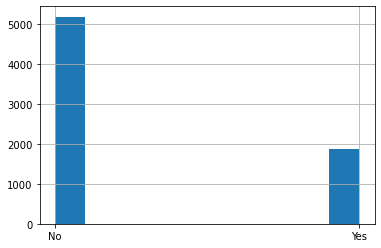

In [14]:
telco.churn.hist()

In [18]:
round(telco[telco.churn == "Yes"].shape[0] / telco.shape[0]*100, 2)

26.53

#### There is a 26.53% churn of Telco clients
#### The telecommunication industry according to Statista and smartlook.com has an average churn rate of 21%.
#### This means that TelcoCo has an above average churn rate.
#### Questions we can ask ourselves are:
- Is TelcoCo recovering customer acquisition costs before they leave?
- Is the company's growth rate higher than it's churn rate?
#### We cannot answer the previous questions so we will move onto the next ones.

#### According to Investopedia, a churn rate is the most valuable when we know what type of customer has churned. We can ask ourselves:
- What is the cost of those who are leaving?

In [40]:
telco[telco.churn == 'Yes'].shape[0]

1870

In [47]:
churn_yes = telco[telco.churn == 'Yes'].shape[0]

<AxesSubplot:xlabel='has_churned', ylabel='total_charges'>

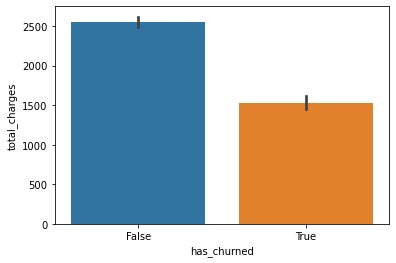

In [49]:
sns.barplot(data = telco, x="has_churned", y="total_charges")

- Is there a factor that determine significantly which customer is leaving and who is staying?
#### Let's find out by computing the correlation between meaningful variables we have.